In [1]:
# basic libraries
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
# selection of specific features
mol_df = pd.read_csv('../../../data/her_molecules.csv')
mol_df = mol_df[['name','smiles','pIC50','activity']]
print(f'DataFrame shape: {mol_df.shape}')
mol_df.head(2)

DataFrame shape: (2593, 4)


,name,smiles,pIC50,activity
0,CHEMBL477,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,15.204120,low
1,CHEMBL433520,CCN(CC)CC(O)CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,15.041393,low


###### Standardization of  molecules

In [4]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs

In [5]:
def standardize(smiles):
    
    # create kdkit mol object
    mol = [Chem.MolFromSmiles(x) for x in smiles]
    # salt removal 
    largest_frag = [rdMolStandardize.LargestFragmentChooser().choose(x) for x in mol]
    # normalization to correct functional groups
    normal = [rdMolStandardize.Normalizer().normalize(x) for x in largest_frag]
    # uncharger
    uncharged = [rdMolStandardize.Uncharger().uncharge(x) for x in normal]
    # reionise
    reioned = [rdMolStandardize.Reionizer().reionize(x) for x in uncharged]
    # neutralize the mol
    neutral = [rdMolStandardize.Uncharger().uncharge(x) for x in reioned]
    # tautomer enumeration
    clean_mol = [rdMolStandardize.TautomerEnumerator().Canonicalize(x) for x in tqdm(neutral)]
    
    return clean_mol

In [6]:
block = BlockLogs()
mols = standardize(mol_df['smiles'])
del block

100%|███████████████████████████████████████████████████████████| 2593/2593 [01:32<00:00, 27.94it/s]


In [11]:
mol_df['mols'] = mols
print(f'Shape of the dataset: {mol_df.shape}')
mol_df.head(2)

Shape of the dataset: (2593, 5)


,name,smiles,pIC50,activity,mols
0,CHEMBL477,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,15.204120,low,<rdkit.Chem.rdchem.Mol object at 0x7f0bfed64c40>
1,CHEMBL433520,CCN(CC)CC(O)CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,15.041393,low,<rdkit.Chem.rdchem.Mol object at 0x7f0bfed64d60>


In [12]:
# save
mol_df.to_csv('../../../data/clean_her_molecules.csv', index=False)

In [7]:
# viewing of molecules
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

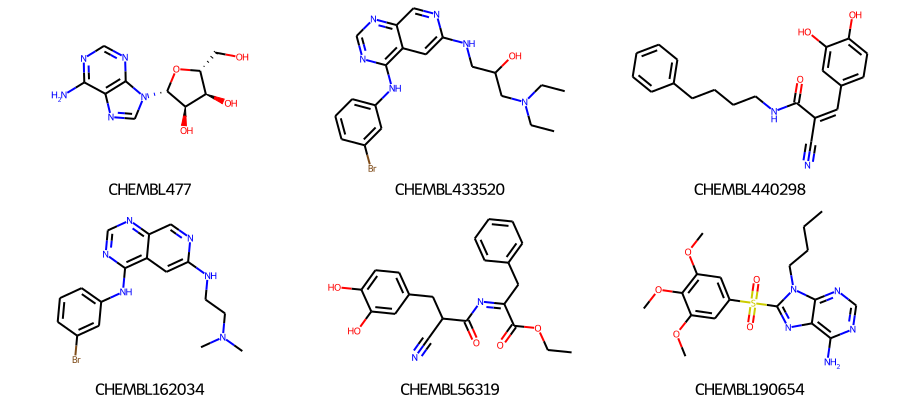

In [8]:
Draw.MolsToGridImage(
    mol_df['mols'][:6].tolist(), 
    legends= mol_df['name'].tolist(),
    subImgSize=(300, 200), 
    useSVG=True
    )